In [ ]:
!pip install -q transformers accelerate hiddenlayer torchinfo torchview datasets peft bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from torchinfo import summary
import torch

# Load model & tokenizer
model = AutoModelForCausalLM.from_pretrained("deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B")
tokenizer = AutoTokenizer.from_pretrained("deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/679 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.55G [00:00<?, ?B/s]

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.07k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

In [ ]:
# Dummy input
inputs = tokenizer("Hello, this can be a test. May or may not, idk", return_tensors="pt")

In [ ]:
import torch.nn as nn

class WrappedModel(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def forward(self, x):
        return self.model(input_ids=x)


In [ ]:
wrapped = WrappedModel(model)
wrapped.eval()  # just in case

summary(
    wrapped,
    input_size=(1, inputs["input_ids"].shape[1]),
    dtypes=[torch.long],
    col_names=["input_size", "output_size", "num_params", "trainable"],
    depth=6  # how deep to go into submodules
)


Layer (type:depth-idx)                             Input Shape               Output Shape              Param #                   Trainable
WrappedModel                                       [1, 16]                   --                        --                        True
├─Qwen2ForCausalLM: 1-1                            --                        --                        --                        True
│    └─Qwen2Model: 2-1                             --                        --                        --                        True
│    │    └─Embedding: 3-1                         [1, 16]                   [1, 16, 1536]             233,373,696               True
│    │    └─Qwen2RotaryEmbedding: 3-2              [1, 16, 1536]             [1, 16, 128]              --                        --
│    │    └─ModuleList: 3-3                        --                        --                        --                        True
│    │    │    └─Qwen2DecoderLayer: 4-1            [1, 16, 

In [ ]:
from torchview import draw_graph
import hiddenlayer as hl


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/679 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.55G [00:00<?, ?B/s]

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

In [ ]:
print(model.config)

Qwen2Config {
  "_attn_implementation_autoset": true,
  "architectures": [
    "Qwen2ForCausalLM"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 151643,
  "eos_token_id": 151643,
  "hidden_act": "silu",
  "hidden_size": 1536,
  "initializer_range": 0.02,
  "intermediate_size": 8960,
  "max_position_embeddings": 131072,
  "max_window_layers": 21,
  "model_type": "qwen2",
  "num_attention_heads": 12,
  "num_hidden_layers": 28,
  "num_key_value_heads": 2,
  "rms_norm_eps": 1e-06,
  "rope_scaling": null,
  "rope_theta": 10000,
  "sliding_window": 4096,
  "tie_word_embeddings": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.1",
  "use_cache": true,
  "use_mrope": false,
  "use_sliding_window": false,
  "vocab_size": 151936
}



In [ ]:
print(model)

Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(151936, 1536)
    (layers): ModuleList(
      (0-27): 28 x Qwen2DecoderLayer(
        (self_attn): Qwen2Attention(
          (q_proj): Linear(in_features=1536, out_features=1536, bias=True)
          (k_proj): Linear(in_features=1536, out_features=256, bias=True)
          (v_proj): Linear(in_features=1536, out_features=256, bias=True)
          (o_proj): Linear(in_features=1536, out_features=1536, bias=False)
        )
        (mlp): Qwen2MLP(
          (gate_proj): Linear(in_features=1536, out_features=8960, bias=False)
          (up_proj): Linear(in_features=1536, out_features=8960, bias=False)
          (down_proj): Linear(in_features=8960, out_features=1536, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): Qwen2RMSNorm((1536,), eps=1e-06)
        (post_attention_layernorm): Qwen2RMSNorm((1536,), eps=1e-06)
      )
    )
    (norm): Qwen2RMSNorm((1536,), eps=1e-06)
    (rotary_emb): Qw

In [ ]:
!pip install torchsummary


In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Trainable: {name}")


Trainable: model.embed_tokens.weight
Trainable: model.layers.0.self_attn.q_proj.weight
Trainable: model.layers.0.self_attn.q_proj.bias
Trainable: model.layers.0.self_attn.k_proj.weight
Trainable: model.layers.0.self_attn.k_proj.bias
Trainable: model.layers.0.self_attn.v_proj.weight
Trainable: model.layers.0.self_attn.v_proj.bias
Trainable: model.layers.0.self_attn.o_proj.weight
Trainable: model.layers.0.mlp.gate_proj.weight
Trainable: model.layers.0.mlp.up_proj.weight
Trainable: model.layers.0.mlp.down_proj.weight
Trainable: model.layers.0.input_layernorm.weight
Trainable: model.layers.0.post_attention_layernorm.weight
Trainable: model.layers.1.self_attn.q_proj.weight
Trainable: model.layers.1.self_attn.q_proj.bias
Trainable: model.layers.1.self_attn.k_proj.weight
Trainable: model.layers.1.self_attn.k_proj.bias
Trainable: model.layers.1.self_attn.v_proj.weight
Trainable: model.layers.1.self_attn.v_proj.bias
Trainable: model.layers.1.self_attn.o_proj.weight
Trainable: model.layers.1.mlp

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt

model_id = "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.float16,  # Use float32 if you don't have GPU
    device_map="auto"
)
model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/3.07k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/679 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.55G [00:00<?, ?B/s]

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(151936, 1536)
    (layers): ModuleList(
      (0-27): 28 x Qwen2DecoderLayer(
        (self_attn): Qwen2Attention(
          (q_proj): Linear(in_features=1536, out_features=1536, bias=True)
          (k_proj): Linear(in_features=1536, out_features=256, bias=True)
          (v_proj): Linear(in_features=1536, out_features=256, bias=True)
          (o_proj): Linear(in_features=1536, out_features=1536, bias=False)
        )
        (mlp): Qwen2MLP(
          (gate_proj): Linear(in_features=1536, out_features=8960, bias=False)
          (up_proj): Linear(in_features=1536, out_features=8960, bias=False)
          (down_proj): Linear(in_features=8960, out_features=1536, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): Qwen2RMSNorm((1536,), eps=1e-06)
        (post_attention_layernorm): Qwen2RMSNorm((1536,), eps=1e-06)
      )
    )
    (norm): Qwen2RMSNorm((1536,), eps=1e-06)
    (rotary_emb): Qw

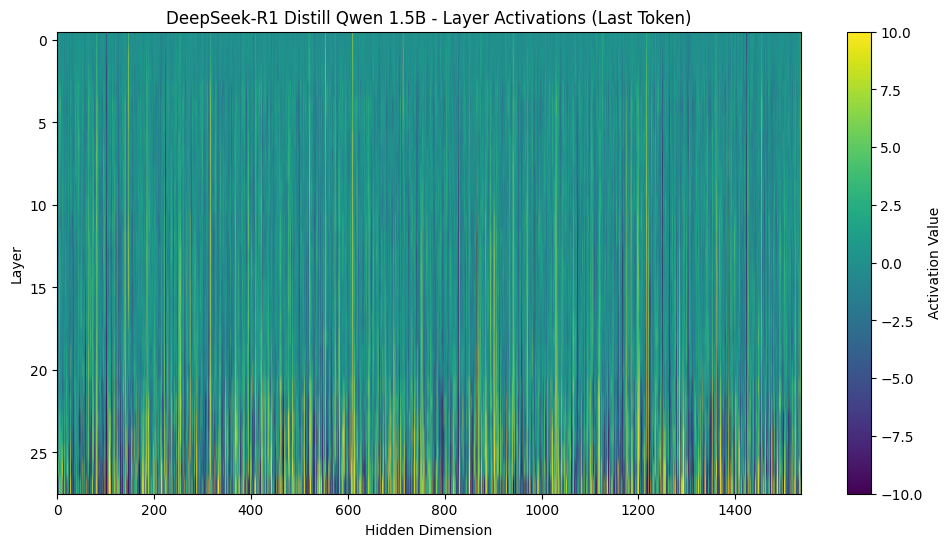

In [ ]:
text = "If my name is Deep, then what is my name?"
inputs = tokenizer(text, return_tensors="pt").to(model.device)

activations = {}

def get_hook(name):
    def hook_fn(module, input, output):
        # Assuming output is a tuple and the first element is the hidden state tensor
        activations[name] = output[0].detach().cpu()  # Access the first element
    return hook_fn

# Attach hooks to each transformer block
for i, block in enumerate(model.model.layers):  # Qwen-style block access
    block.register_forward_hook(get_hook(f"layer_{i}"))

# Run a forward pass to populate activations
with torch.no_grad():
    _ = model(**inputs)

# Visualize hidden states for each layer (e.g., last token)
last_token_index = 4
layer_outputs = [activations[f"layer_{i}"][0, last_token_index].numpy() for i in range(len(activations))]

# Convert to a matrix for plotting
import numpy as np
hidden_matrix = np.stack(layer_outputs)  # shape: (num_layers, hidden_dim)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(hidden_matrix, aspect='auto', cmap='viridis', vmin=-10, vmax=10)
plt.colorbar(label='Activation Value')
plt.xlabel("Hidden Dimension")
plt.ylabel("Layer")
plt.title("DeepSeek-R1 Distill Qwen 1.5B - Layer Activations (Last Token)")
plt.show()

In [ ]:
hidden_matrix

array([[-7.1259689e-01, -7.8463912e-02, -8.2786179e-01, ...,
         1.6815032e+00, -1.1136771e+00,  1.3426304e-02],
       [-1.2451714e+01, -6.3318582e+00,  5.1043425e+00, ...,
         1.4526249e+00,  1.5682028e+01, -4.7300420e+00],
       [-3.3227720e+00, -3.8651371e-01,  3.4490322e+01, ...,
         7.4737349e+00,  6.7277098e+00,  2.2861362e+01],
       ...,
       [-5.6485133e+00,  2.0857930e+00,  3.8409378e+01, ...,
         8.8095627e+00, -2.3859966e-01,  1.6278137e+01],
       [-1.5004229e+01,  2.9935849e+00,  3.7999626e+01, ...,
        -2.6150866e+00,  5.4061723e-01,  2.6598183e+01],
       [ 4.4242485e+01, -5.9935471e+01,  6.4293770e+01, ...,
         3.3620288e+00,  5.1851498e+01,  2.1438286e+01]], dtype=float32)

In [ ]:
model.model.layers

ModuleList(
  (0-27): 28 x Qwen2DecoderLayer(
    (self_attn): Qwen2Attention(
      (q_proj): Linear(in_features=1536, out_features=1536, bias=True)
      (k_proj): Linear(in_features=1536, out_features=256, bias=True)
      (v_proj): Linear(in_features=1536, out_features=256, bias=True)
      (o_proj): Linear(in_features=1536, out_features=1536, bias=False)
    )
    (mlp): Qwen2MLP(
      (gate_proj): Linear(in_features=1536, out_features=8960, bias=False)
      (up_proj): Linear(in_features=1536, out_features=8960, bias=False)
      (down_proj): Linear(in_features=8960, out_features=1536, bias=False)
      (act_fn): SiLU()
    )
    (input_layernorm): Qwen2RMSNorm((1536,), eps=1e-06)
    (post_attention_layernorm): Qwen2RMSNorm((1536,), eps=1e-06)
  )
)